In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## Plotting Functions

In [23]:
def plot_trajectory(time, actual, desired, title="Trajectory", xlabel="Time (s)", ylabel="Value"):
    plt.figure(figsize=(10, 6))
    plt.plot(time, desired, label='Desired', linestyle='--')
    plt.plot(time, actual, label='Actual', linestyle='-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()

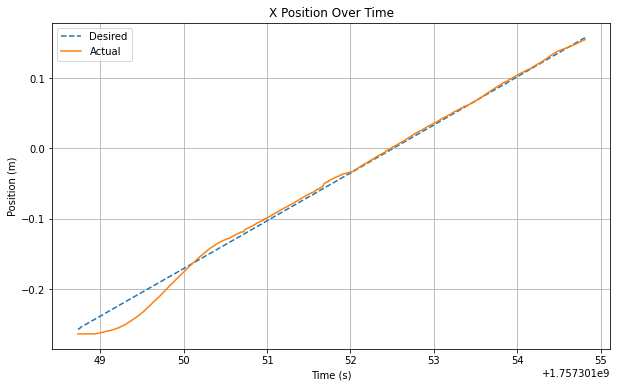

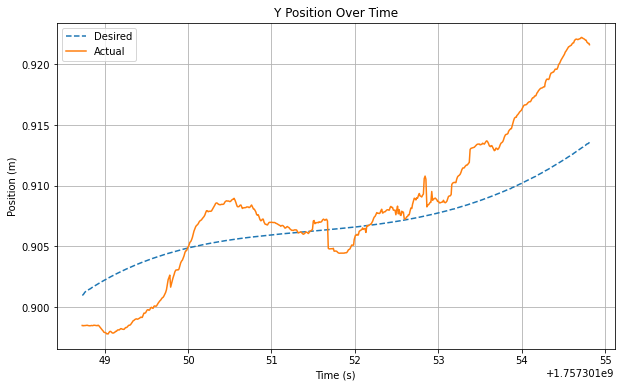

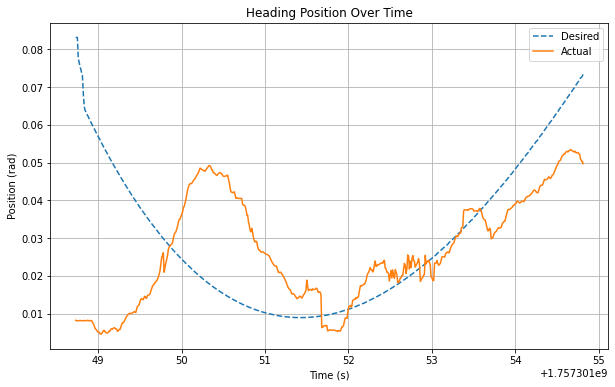

In [24]:
trial_name = 'test_trial'
# file_path = f'../data/{trial_name}/trajectory_data.csv'
file_path = '../data/09-07_dataset/09-07_a_trial_26/trajectory_data.csv'
time_col = 'ros_time_sec'

robot = 'ross'

traj_df = pd.read_csv(file_path)

plot_trajectory(
    traj_df[time_col], 
    traj_df[f'act_{robot}_x'],
    traj_df[f'des_{robot}_x'],
    title="X Position Over Time", 
    xlabel="Time (s)", 
    ylabel="Position (m)"
)

plot_trajectory(
    traj_df[time_col], 
    traj_df[f'act_{robot}_y'],
    traj_df[f'des_{robot}_y'],
    title="Y Position Over Time", 
    xlabel="Time (s)", 
    ylabel="Position (m)", 
)

plot_trajectory(
    traj_df[time_col], 
    traj_df[f'act_{robot}_theta'],
    traj_df[f'des_{robot}_theta'],
    title="Heading Position Over Time", 
    xlabel="Time (s)", 
    ylabel="Position (rad)", 
)